<a href="https://colab.research.google.com/github/mantoan-thi/B2B-Business-to-Business/blob/main/Sales_Prediction_with_Machine_Learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de vendas com aprendizado de máquina

A previsão de vendas é um problema difícil para todo tipo de empresa, mas ajuda a determinar onde uma empresa deve gastar mais em publicidade e onde deve cortar os gastos. 

O que é previsão de vendas?
A previsão de vendas significa prever quanto de um produto as pessoas comprarão com base em fatores como o valor que você gasta para anunciar seu produto, o segmento de pessoas para o qual você anuncia ou a plataforma na qual você está anunciando sobre seu produto.

Normalmente, as vendas de um produto dependem principalmente de quanto você gasta em anunciá-lo. Quanto mais pessoas o seu produto alcançar, mais as vendas aumentarão, desde que a qualidade do seu produto seja boa. Agora, na seção abaixo, apresentarei um projeto de aprendizado de máquina sobre previsão de vendas usando Python.

# Projeto

In [184]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

In [342]:
# importando dados
url = pd.read_csv('/content/dataset_treino.csv')
url.drop(columns=['Store','Date','StateHoliday'], inplace=True)
url = url[0:200]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [344]:
class previsao():
  def __init__(self,url):
      self.url = url
      self.acuracia = 0
      self.prev = 0
      self.valor_real = 0
      self.dados = 0


  def coletar_dados(self,d = False):
      if d == True:
        self.dados = pd.read_csv(self.url)
      else:
        self.dados = self.url
      return self.dados

  def check_isnull(self):
    self.dadosIsnull = self.dados.isnull().sum()
    return self.dadosIsnull

  def plot_dados(self):
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(12, 10))
    sns.heatmap(self.dados.corr())
    plt.show()
  
  def ml_model(self,coluna):
    x = np.array(self.dados.drop([coluna], 1))
    y = np.array(self.dados[coluna])
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
    model = LinearRegression().fit(xtrain, ytrain)
    acuracia = "{:.2%}".format(model.score(xtrain, ytrain))
    ypred = model.predict(xtest)
    self.prev = pd.DataFrame(data={"Valor previsto": ypred.flatten()})
    self.valor_real = pd.DataFrame(data={"Valor real": ytest.flatten()})
    return acuracia, self.prev, self.valor_real
  
  def plot_interativo(self):
    # Gráfico interativos
    trace1 = {
      'x': self.prev.index.values,
      'y': self.prev['Valor previsto'],
      'type': 'scatter',
      'mode': 'lines',
      'line': {'width': 1,'color': 'Red'},
      'name': 'Valor Previsto'}

    trace2 = {
      'x': self.valor_real.index.values,
      'y': self.valor_real['Valor real'],
      'type': 'scatter',
      'mode': 'lines',
      'line': {'width': 1,'color': 'blue'},
          'name': 'Valor Real'}

    # informar todos os dados e gráficos em uma lista
    result = [trace1,trace2]
      
    # configurar o layout do gráfico
    layout = go.Layout({
        'title': {
            'text': 'PREVISÃO DE VENDAS',
            'font': {'size': 22}}
      })
      
    # instanciar objeto Figure e plotar o gráfico
    fig = go.Figure(data=result, layout=layout)
    fig.show(renderer="colab")
  

In [345]:
# Instanciando o objeto
pv = previsao(url)

In [346]:
# Coletando dados
pv.coletar_dados().head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,5,5263,555,1,1,1
1,5,6064,625,1,1,1
2,5,8314,821,1,1,1
3,5,13995,1498,1,1,1
4,5,4822,559,1,1,1


In [347]:
# Checando valores nulos
pv.check_isnull()

DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
SchoolHoliday    0
dtype: int64

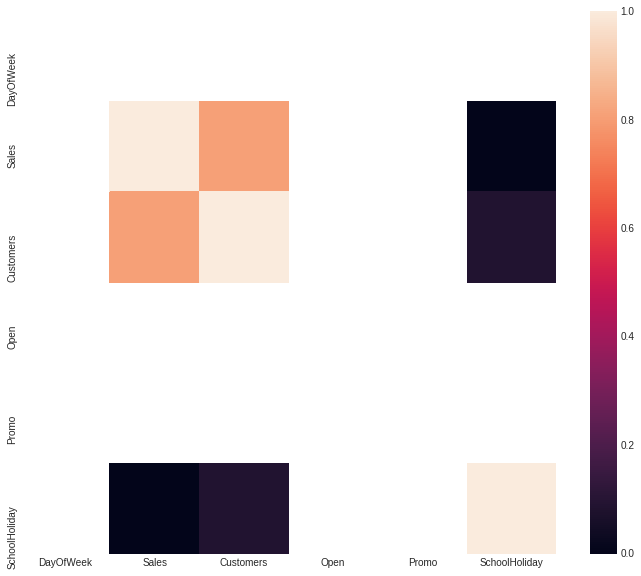

In [348]:
# Imprimindo dados
pv.plot_dados()

In [349]:
# Checando as colunas
pv.coletar_dados().columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday'], dtype='object')

In [350]:
# Prevendo as vendas

acuracia,valor_previsto, valor_real= pv.ml_model(pv.coletar_dados().columns[1])

In [351]:
# Score
print('Score:',acuracia)

Score: 65.38%


In [352]:
# Valor previsto
valor_previsto.head()

,Valor previsto
0,7038.737372
1,10092.037503
2,7313.284795
3,9343.325872
4,13286.825224


In [353]:
# Valor real
valor_real.head()

,Valor real
0,6370
1,10231
2,7248
3,9758
4,10241


In [355]:
# Concatenando os dataframe
resultado = pd.concat([valor_previsto, valor_real], axis=1)

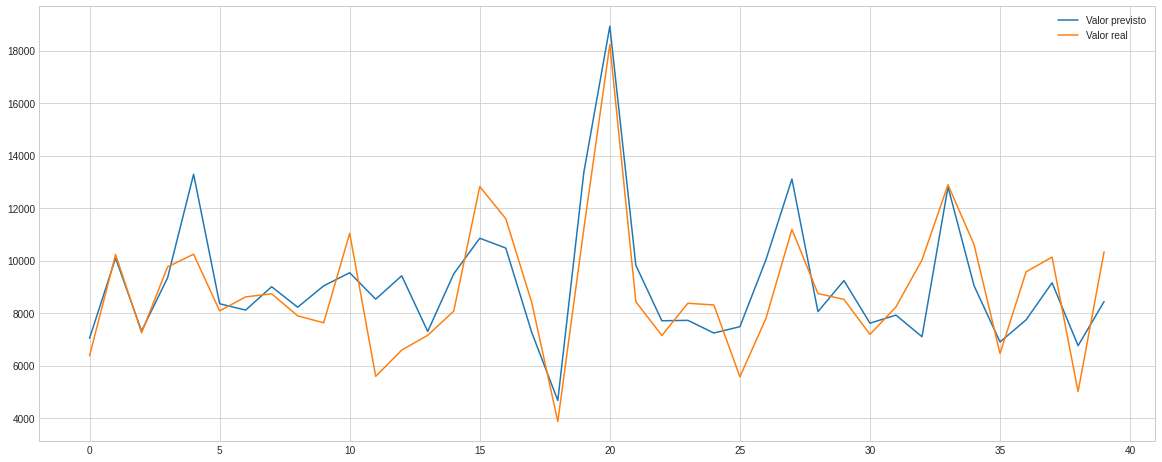

In [356]:
# Plotando gráfico
resultado.plot(figsize=(20,8));

In [357]:
# Protando gráfico interativos
pv.plot_interativo()